In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
titanic_data = sns.load_dataset('titanic')


In [ ]:
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)
titanic_data.drop(['who', 'deck', 'alive', 'alone'], axis=1, inplace=True)


In [ ]:
print(titanic_data)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female  28.0      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

     adult_male  embark_town  
0          True  Sou

In [ ]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   adult_male   891 non-null    bool    
 10  embark_town  889 non-null    object  
dtypes: bool(1), category(1), float64(2), int64(4), object(3)
memory usage: 64.6+ KB


In [ ]:
titanic_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
adult_male     0
embark_town    2
dtype: int64

In [ ]:
titanic_data.shape

(891, 11)

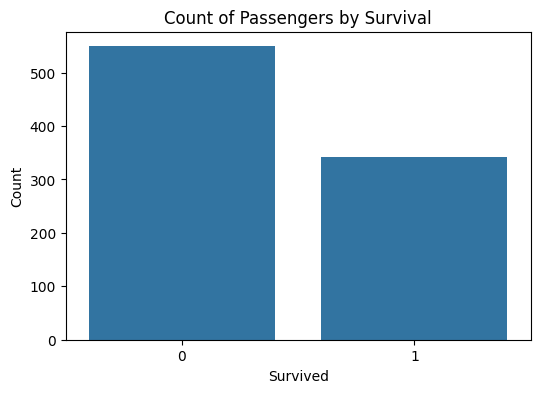

Survival Count plot generated.


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=titanic_data)
plt.title('Count of Passengers by Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
print("Survival Count plot generated.")


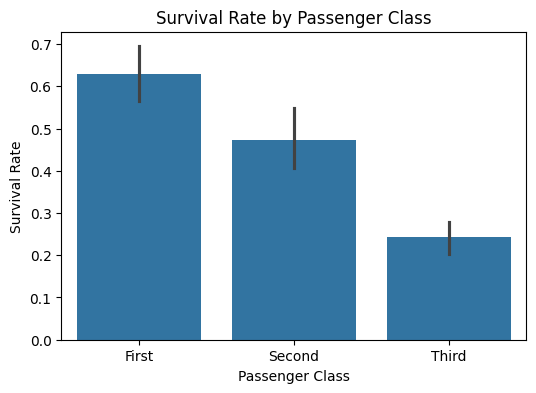

Survival Rate by Passenger Class plot generated.


In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='class', y='survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
print("Survival Rate by Passenger Class plot generated.")


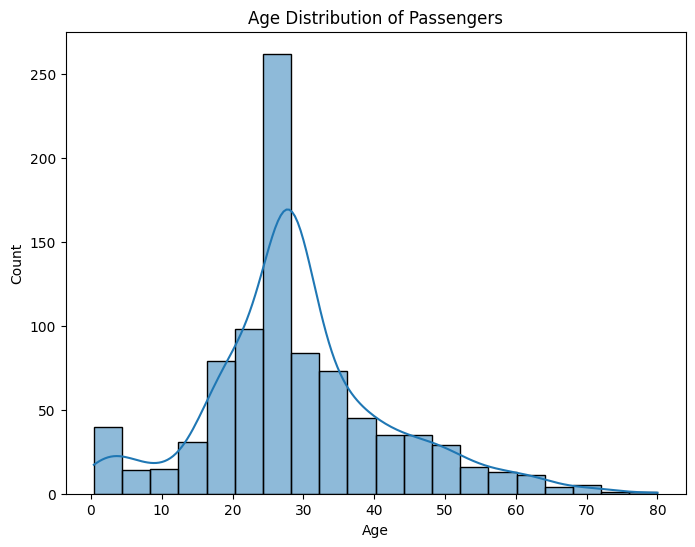

Age Distribution of Passengers plot generated.


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("Age Distribution of Passengers plot generated.")


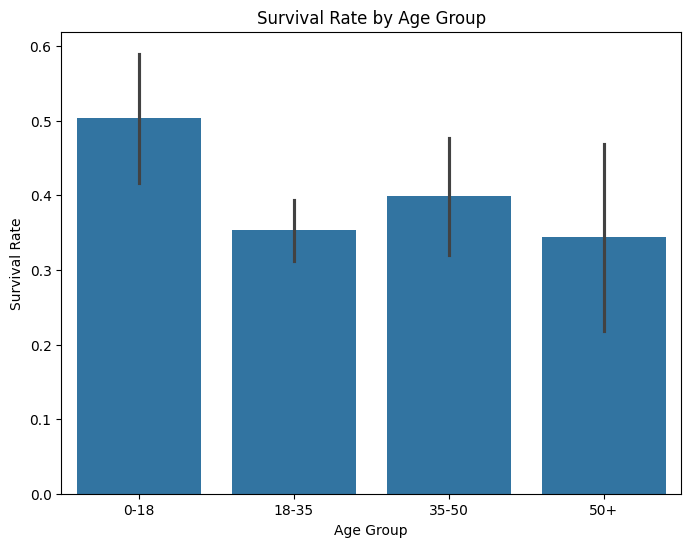

Survival Rate by Age Group plot generated.


In [ ]:
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=[0, 18, 35, 50, 80], labels=['0-18', '18-35', '35-50', '50+'])
plt.figure(figsize=(8, 6))
sns.barplot(x='age_group', y='survived', data=titanic_data)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()
print("Survival Rate by Age Group plot generated.")


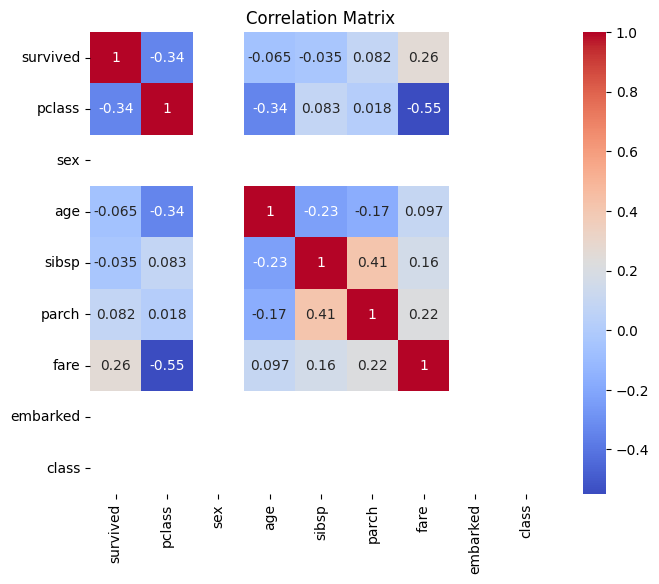

Correlation Matrix plot generated.


In [ ]:
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})
plt.figure(figsize=(8, 6))
corr_matrix = titanic_data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
print("Correlation Matrix plot generated.")

Based on the exploratory data analysis (EDA) of the Titanic dataset, here are some identified patterns and trends:

1. Survival by Gender:
   - Females had a significantly higher survival rate compared to males. This suggests that gender played a crucial role in survival, likely due to the "women and children first" protocol during the Titanic disaster.

2. Survival by Passenger Class:
   - Passengers in higher classes (1st class) had higher survival rates compared to lower classes (2nd and 3rd class). This indicates that socio-economic status was a factor in survival, possibly due to better access to lifeboats and priority during evacuation.

3. Age Distribution and Survival:
   - The majority of passengers were in the 18-35 age range. Children (0-18) had a higher survival rate compared to adults, particularly those in the middle age groups (35-50 and 50+). This aligns with the priority given to younger individuals during the evacuation.

4. Correlation Between Variables:
   - There is a negative correlation between `Pclass` (passenger class) and `Survived` (survival), indicating that higher class passengers were more likely to survive.
   - There is a slight negative correlation between `Age` and `Pclass`, suggesting that older passengers tended to occupy higher classes.

5. Overall Survival Rate:
   - The overall survival rate was lower, with a larger proportion of passengers not surviving the disaster. This reflects the tragic nature of the Titanic sinking.

6. Impact of Missing Data Handling:
   - Missing values in the `Age` and `Embarked` columns were handled by imputing median values and the most common value, respectively. This ensured that the analysis was based on the most complete dataset possible.